In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
ces = pd.read_csv('cces_example_data.csv')
ces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [3]:
ces.shape

(659, 21)

In [4]:
ces.columns

Index(['pew_religimp', 'pew_churatd', 'sex', 'educ', 'nonwhite', 'age',
       'faminc_new', 'pid3', 'ideo5', 'QueerPhobia', 'ImmiPhobia',
       'InterGBiasParty', 'InterGBiasCand', 'InterGBiasSup', 'LibMediaUse',
       'ConMediaUse', 'Real_Threat', 'Symb_Threat', 'Evaluation', 'teamweight',
       'caseid'],
      dtype='object')

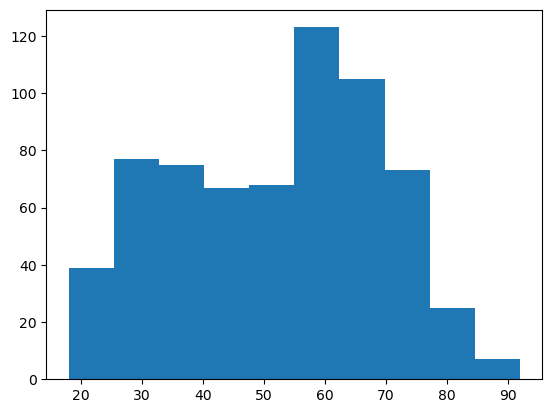

In [5]:
fig1, ax1 = plt.subplots()
ax1.hist(ces['age'])
plt.show()

In [6]:
age_desc = stats.describe(ces['age'])
age_desc.minmax

(18, 92)

In [7]:
age_desc.mean

52.180576631259484

In [8]:
age_desc.nobs

659

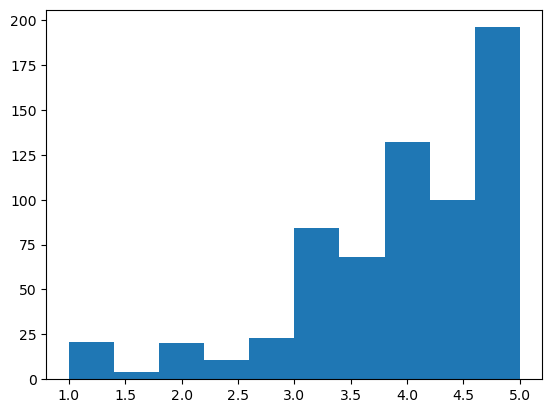

In [9]:
fig2, ax2 = plt.subplots()
ax2.hist(ces['Symb_Threat'])
plt.show()

In [10]:
stats.describe(ces['Symb_Threat'])

DescribeResult(nobs=659, minmax=(1.0, 5.0), mean=3.9377845220030347, variance=0.9335031668229046, skewness=-1.0528237646429746, kurtosis=0.8267764186309705)

In [11]:
fit1 = smf.ols('Symb_Threat ~ age', data = ces).fit()

In [12]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Symb_Threat   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.107
Date:                Thu, 14 Nov 2024   Prob (F-statistic):             0.0242
Time:                        12:17:39   Log-Likelihood:                -909.36
No. Observations:                 659   AIC:                             1823.
Df Residuals:                     657   BIC:                             1832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6749      0.122     30.064      0.000       3.435       3.915
age            0.0050      0.002      2.260      0.024       0.001       0.009
==============================================================================
Omnibus:                       99.333   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.106
Skew:                          -1.053   Prob(JB):                     5.10e-32
Kurtosis:                       3.901   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
3.6 + (.0050*18)

3.69

In [14]:
3.6 + (.0050*90)

4.05

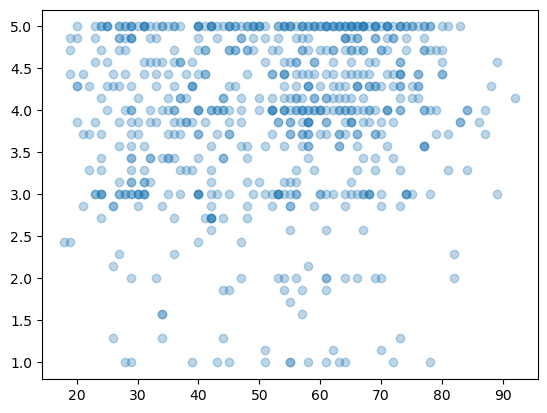

In [15]:
fig3, ax3 = plt.subplots()
ax3.scatter(ces['age'], ces['Symb_Threat'], alpha = .3)
plt.show()

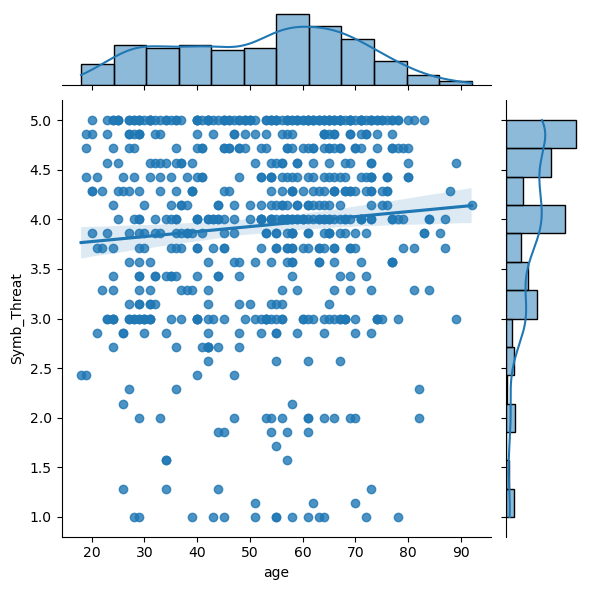

In [16]:
sns.jointplot(kind = 'reg', data = ces,
              x = 'age', y = 'Symb_Threat')

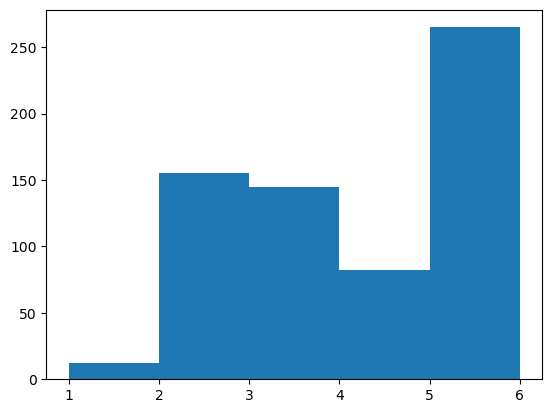

In [17]:
fig4, ax4 = plt.subplots()
ax4.hist(ces['educ'], bins = 5)
plt.show()

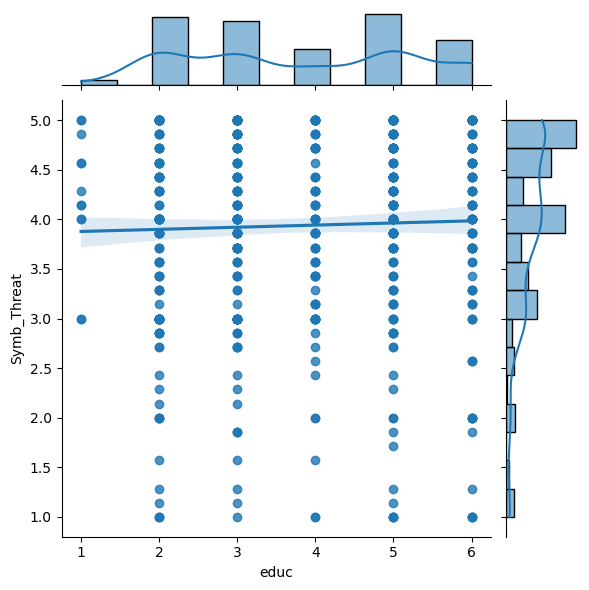

In [18]:
sns.jointplot(kind = 'reg', data = ces,
              x = 'educ', y = 'Symb_Threat')
plt.show()

In [19]:
fit2 = smf.ols('Symb_Threat ~ educ', data = ces).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Symb_Threat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6990
Date:                Thu, 14 Nov 2024   Prob (F-statistic):              0.403
Time:                        12:17:41   Log-Likelihood:                -911.56
No. Observations:                 659   AIC:                             1827.
Df Residuals:                     657   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8561      0.105     36.844      0.000       3.651       4.062
educ           0.0214      0.026      0.836      0.403      -0.029       0.072
==============================================================================
Omnibus:                       99.286   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.576
Skew:                          -1.059   Prob(JB):                     6.65e-32
Kurtosis:                       3.864   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
ces['sex_c'] = ces['sex'].astype('category')

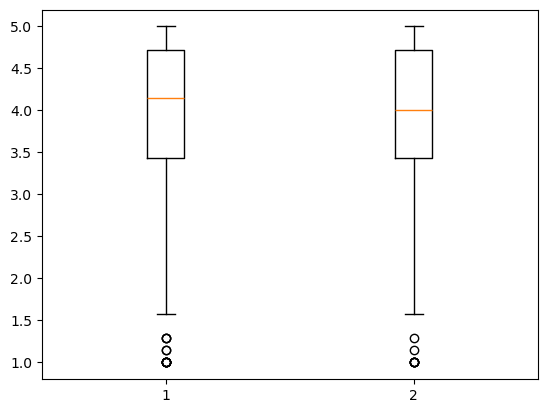

In [21]:
male_st = ces[ces['sex_c'] == 1]['Symb_Threat']
female_st = ces[ces['sex_c'] == 2]['Symb_Threat']

fig5, ax5 = plt.subplots()
ax5.boxplot([male_st, female_st])
plt.show()